In [1]:
import numpy as np
import sympy as sp

In [2]:
# a = np.ones(3)
# b = np.ones(3)
a = np.ones((1, 3))
b = np.ones((1, 3))
c = np.hstack((a, b))
a.shape, b.shape, c.shape

((1, 3), (1, 3), (1, 6))

In [3]:
x0 = np.array([71.1, 72.4, 72.4, 72.1, 71.4, 72.0, 71.6])
n = len(x0)
lamda = x0[: -1] / x0[1:]
lamda

array([0.9820442 , 1.        , 1.00416089, 1.00980392, 0.99166667,
       1.00558659])

In [4]:
b1 = [min(lamda), max(lamda)]
b1

[0.9820441988950275, 1.0098039215686272]

In [5]:
b2 = [np.exp(-2 / (n + 1)), np.exp(2 / (n + 1))]
b2

[0.7788007830714049, 1.2840254166877414]

In [6]:
x1 = np.cumsum(x0)
z = (x1[:-1] + x1[1:]) / 2
z.shape

(6,)

In [7]:
np.ones(n - 1).shape

(6,)

In [8]:
B = np.vstack((-z, np.ones(n - 1))).T
B.shape

(6, 2)

In [9]:
u = np.linalg.pinv(B) @ x0[1:]
u

array([2.34378648e-03, 7.26572696e+01])

In [10]:
t = sp.var("t")
x = sp.var("x", cls=sp.Function)
eq = x(t).diff(t) + u[0] * x(t) - u[1]
eq

0.00234378647852337*x(t) + Derivative(x(t), t) - 72.6572696036788

In [11]:
xt0 = sp.dsolve(eq, ics={x(0): x0[0]})
xt0

Eq(x(t), 30999.9525423725 - 30928.8525423725*exp(-0.00234378647852337*t))

In [12]:
xt0 = xt0.args[1]
xt0

30999.9525423725 - 30928.8525423725*exp(-0.00234378647852337*t)

In [13]:
xt = sp.lambdify(t, xt0, "numpy")
sp.pprint(xt)

<function _lambdifygenerated at 0x000002239E064700>


In [14]:
t = np.arange(n + 1)
t

array([0, 1, 2, 3, 4, 5, 6, 7])

In [15]:
xh = xt(t)
xh

array([ 71.1       , 143.50574144, 215.741978  , 287.8091065 ,
       359.70752283, 431.43762195, 502.9997979 , 574.3944438 ])

In [16]:
x0h = np.hstack([x0[0], np.diff(xh)])  #还原数据
x0h

array([71.1       , 72.40574144, 72.23623656, 72.0671285 , 71.89841633,
       71.73009912, 71.56217595, 71.39464589])

In [17]:
x1993 = x0h[-1]  #提取1993年的预测值
cha = x0 - x0h[:-1]
delta = abs(cha / x0) * 100  #计算相对误差
print(delta)
rho = abs(1 - (1 - 0.5 * u[0]) / (1 + 0.5 * u[0]) * lamda)
print('1993年预测值：', round(x1993, 4))

[0.         0.00793017 0.22619259 0.04559154 0.69806209 0.37486233
 0.05282689]
1993年预测值： 71.3946


In [18]:
x0 = np.array([41, 49, 61, 78, 96, 104])  #原始序列
n = len(x0)
x1 = np.cumsum(x0)
x1

array([ 41,  90, 151, 229, 325, 429])

In [19]:
ax0 = np.diff(x0)
ax0

array([ 8, 12, 17, 18,  8])

In [20]:
z = (x1[1:] + x1[:-1]) / 2
z

array([ 65.5, 120.5, 190. , 277. , 377. ])

In [21]:
B = np.vstack([-x0[1:], -z, np.ones(n - 1)]).T
B.shape

(5, 3)

In [22]:
u = np.linalg.pinv(B) @ ax0
u

array([ -1.09219635,   0.19590335, -31.79834712])

In [23]:
t = sp.var("t")
x = sp.var("x", cls=sp.Function)
eq = x(t).diff(t, 2) + u[0] * x(t).diff(t) + u[1] * x(t) - u[2]
s = sp.dsolve(eq, ics={x(0): x1[0], x(5): x1[-1]})
s

Eq(x(t), 203.849012866397*exp(0.22622340416904*t) - 0.532505769427845*exp(0.865972945416789*t) - 162.31650709697)

In [24]:
s.args

(x(t),
 203.849012866397*exp(0.22622340416904*t) - 0.532505769427845*exp(0.865972945416789*t) - 162.31650709697)

In [25]:
xt = s.args[1]

In [26]:
x = sp.lambdify(t, xt, "numpy")
x

<function _lambdifygenerated(t)>

In [27]:
xh1 = x(np.arange(n))
xh1

array([ 41.        ,  92.01481441, 155.1560522 , 232.36719237,
       324.52198208, 429.        ])

In [28]:
xh0 = np.hstack([x0[0], np.diff(xh1)])  #还原数据
xh0

array([ 41.        ,  51.01481441,  63.14123779,  77.21114017,
        92.15478971, 104.47801792])

In [29]:
ea = x0 - xh0
er = abs(ea) / x0 * 100
er

array([0.        , 4.11186614, 3.51022588, 1.01135875, 4.00542739,
       0.45963262])

In [30]:
x0 = np.array([2.874, 3.278, 3.39, 3.679, 3.77, 3.8])  #原始序列
n = len(x0);
ax0 = np.diff(x0)  #计算1次累减序列
ax0

array([0.404, 0.112, 0.289, 0.091, 0.03 ])

In [31]:
B = np.vstack([-x0[1:], np.ones(n - 1)]).T
u = np.linalg.pinv(B) @ ax0  #最小二乘法拟合参数
sp.var('t');
sp.var('x', cls=sp.Function)  #定义符号变量和函数
eq = x(t).diff(t, 2) + u[0] * x(t).diff(t) - u[1]
s = sp.dsolve(eq, ics={x(0): x0[0], x(t).diff(t).subs(t, 0): x0[0]})
xt = s.args[1]  #提取解的符号表达式
x = sp.lambdify(t, xt, 'numpy')  #转换为匿名函数
xh1 = x(np.arange(n))  #求预测值
xh0 = np.hstack([x0[0], np.diff(xh1)])  #还原数据
ea = x0 - xh0  #计算预测的残差
er = abs(ea) / x0 * 100  #计算相对误差
print('参数u：', np.round(u, 4))

参数u： [0.424  1.7046]


In [32]:
x0 = np.array([4.93, 2.33, 3.87, 4.35, 6.63, 7.15, 5.37, 6.39, 7.81, 8.35])  #原始序列
n = len(x0)
x1 = np.cumsum(x0)  #求累加序列
z = (x1[1:] + x1[:-1]) / 2  #求均值生成序列
B = np.vstack([-z, z ** 2]).T
u = np.linalg.pinv(B) @ x0[1:]  #最小二乘法拟合参数
print('参数u：', np.round(u, 4))
#下面直接利用解的表达式写出对应的匿名函数
x = lambda t: u[0] * x0[0] / (u[1] * x0[0] + (u[0] - u[1] * x0[0]) * np.exp(u[0] * t))
xh1 = x(np.arange(n))  #求预测值
xh0 = np.hstack([x0[0], np.diff(xh1)])  #还原数据
ea = x0 - xh0  #计算预测的残差
er = abs(ea) / x0 * 100  #计算相对误差
er

参数u： [-0.3576 -0.0041]


array([ 0.        , 16.21558246, 31.89382428, 19.96230262, 32.59970031,
       22.68063946, 21.72037303, 14.65968098,  0.9291917 ,  8.10325804])

In [33]:
with open('data15_5.txt') as f:
    s = f.read().replace('\n', '')
a = np.zeros((2, 2))  #统计数据初始化
mfind = lambda s, c: [x for x in range(s.find(c), len(s)) if s[x:x + 2] == c]
for i in range(2):
    for j in range(2):
        a[i, j] = len(mfind(s, str(i) + str(j)))
print('统计数据矩阵a:\n', a);
print('a的行和：', a.sum(axis=1))

统计数据矩阵a:
 [[ 8. 18.]
 [18. 52.]]
a的行和： [26. 70.]


In [34]:
with open('data15_6.txt') as f:
    s = f.read().replace(' ', '').replace('\n', '')
a = np.zeros((4, 4))  #统计数据初始化
mfind = lambda s, c: [x for x in range(s.find(c), len(s)) if s[x:x + 2] == c]
for i in range(1, 5):
    for j in range(1, 5):
        a[i - 1, j - 1] = len(mfind(s, str(i) + str(j)))
print('统计数据矩阵a:\n', a);
print('a的行和：', a.sum(axis=1))

统计数据矩阵a:
 [[4. 4. 1. 1.]
 [3. 2. 4. 2.]
 [4. 4. 2. 1.]
 [0. 1. 4. 2.]]
a的行和： [10. 11. 11.  7.]


In [36]:
P1 = np.mat([0.2, 0.4, 0.4])
P = np.mat([[0.8, 0.1, 0.1], [0.5, 0.1, 0.4], [0.5, 0.3, 0.2]])
# P4 = P1 @ P ** 3
P4 = P1 @ P @ P @ P
print('P4:', P4)

P4: [[0.7004 0.136  0.1636]]


In [38]:
p = np.array([[0.8, 0.1, 0.1], [0.5, 0.1, 0.4], [0.5, 0.3, 0.2]])
a = np.vstack([p.T - np.eye(3), np.ones(3)])  #构造方程组系数矩阵
a

array([[-0.2,  0.5,  0.5],
       [ 0.1, -0.9,  0.3],
       [ 0.1,  0.4, -0.8],
       [ 1. ,  1. ,  1. ]])

In [39]:
b = np.hstack([np.zeros(3), 1])  #构造方程组常数项列
b

array([0., 0., 0., 1.])

In [37]:
x = np.linalg.pinv(a) @ b  #求线性方程组的数值解
print('解为：', np.round(x, 4))


解为： [0.7143 0.131  0.1548]


In [40]:
p = np.array([[0.8, 0.1, 0.1], [0.5, 0.1, 0.4], [0.5, 0.3, 0.2]])
val, vec = np.linalg.eig(p.T)
s = vec[:, 0] / sum(vec[:, 0])  #最大特征值对应的特征向量归一化
print('求得特征向量为：', np.round(s, 4))

求得特征向量为： [0.7143 0.131  0.1548]


In [41]:
p = np.array([[0.2, 0.8, 0], [0.8, 0, 0.2], [0.1, 0.3, 0.6]])
a = np.vstack([p.T - np.eye(3), np.ones((1, 3))])  #构造方程组系数矩阵
b = np.hstack([np.zeros(3), 1])  #构造方程组常数项列
x = np.linalg.pinv(a) @ b  #求线性方程组的数值解
print('解为：', np.round(x, 4))

解为： [0.4146 0.3902 0.1951]


In [42]:
from sklearn.linear_model import Perceptron

x0 = np.array([[-0.5, -0.5, 0.3, 0.0], [-0.5, 0.5, -0.5, 1.0]]).T
y0 = np.array([1, 1, 0, 0])
md = Perceptron().fit(x0, y0)  #构造并拟合模型
print('模型系数和常数项分别为：', md.coef_, ',', md.intercept_)
print('模型精度：', md.score(x0, y0))  #模型检验
print('预测值为：', md.predict([[-0.5, 0.2]]))

模型系数和常数项分别为： [[-1.3 -0.5]] , [0.]
模型精度： 1.0
预测值为： [1]


In [44]:
#程序文件ex15_11.py
from sklearn.neural_network import MLPClassifier

a = np.loadtxt('data15_11.txt')
x0 = a[:10, :]
x = a[10:, :]  #提出训练样本和待判样本数据
m1 = x0.max(axis=0)
m2 = x0.min(axis=0)  #计算逐列最大值和最小值
bx0 = (x0 - m2) / (m1 - m2)  #数据标准化
bx0[:, 1] = (m1[1] - x0[:, 1]) / (m1[1] - m2[1])  #x2值特殊处理
y0 = np.hstack([np.zeros(5), np.ones(5)])  #标号值
#构造并拟合模型
md = MLPClassifier(solver='lbfgs', activation='relu',
                   hidden_layer_sizes=30).fit(bx0, y0)
bx = (x - m2) / (m1 - m2)  #待判样本数据标准化
bx[:, 1] = (m1[1] - x[:, 1]) / (m1[1] - m2[1])  #x2值特殊处理
yh = md.predict(bx);
print('待判样本类别：,', yh)
print('属于各个类别的概率：\n', md.predict_proba(bx))
print('训练样本的回代准确率：', md.score(bx0, y0))


待判样本类别：, [1. 0.]
属于各个类别的概率：
 [[1.69926741e-03 9.98300733e-01]
 [1.00000000e+00 2.05415703e-12]]
训练样本的回代准确率： 1.0


预测值为：, [54449.6209 56573.6884]
已知数据预测的相对误差： [32.6952 19.8668  3.9346 11.0724 19.814   1.2698  3.3068  1.364   2.4221
  3.65   11.8408  1.0297  5.5573 11.0161 11.6557  3.7571  2.1716  5.0174
  4.372   1.9292]


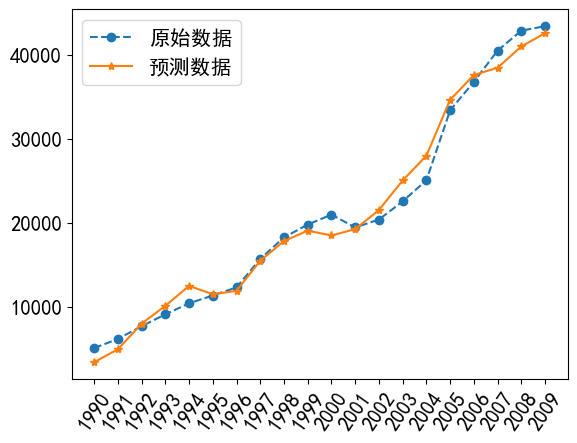

In [45]:
#程序文件ex15_12.py
from sklearn.neural_network import MLPRegressor
import numpy as np
import pylab as plt

a = np.loadtxt('data15_12.txt')
x0 = a[:, :3];
y0 = a[:, 3]  #提出训练样本数据
m1 = x0.max(axis=0);
m2 = x0.min(axis=0)  #计算逐列最大值和最小值
bx0 = 2 * (x0 - m2) / (m1 - m2) - 1  #数据标准化
#构造并拟合模型
md = MLPRegressor(solver='lbfgs', activation='identity',
                  hidden_layer_sizes=10).fit(bx0, y0)
x = np.array([[73.39, 75.55], [3.9635, 4.0975], [0.9880, 1.0268]]).T

bx = 2 * (x - m2) / (m1 - m2) - 1  #数据标准化
yh = md.predict(bx);
print('预测值为：,', np.round(yh, 4))
yh0 = md.predict(bx0);
delta = abs(yh0 - y0) / y0 * 100
print('已知数据预测的相对误差：', np.round(delta, 4))
t = np.arange(1990, 2010)
plt.rc('font', size=15);
plt.rc('font', family='SimHei')
plt.plot(t, y0, '--o', label='原始数据')
plt.plot(t, yh0, '-*', label='预测数据')
plt.xticks(t, rotation=55);
plt.legend();
plt.show()

